In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import get_hex
from highlight_text import fig_text, ax_text
from matplotlib.font_manager import FontProperties

df = pd.read_csv('disaster-events.csv')

def remove_agg_rows(entity: str):
   if entity.lower().startswith('all disasters'):
      return False
   else:
      return True
df = df.replace('Dry mass movement', 'Drought')
df = df[df['Entity'].apply(remove_agg_rows)]
df = df[~df['Entity'].isin(['Fog', 'Glacial lake outburst flood'])]
df = df.pivot_table(index='Entity', columns='Year', values='Disasters').T
df.loc[1900, :] = df.loc[1900, :].fillna(0)
df = df[df.index >= 1960]
df = df[df.index <= 2023]
df = df.interpolate(axis=1)
df.sum(axis=1)

Year
1960     56.0
1961     37.5
1962     36.0
1963     42.0
1964     76.5
        ...  
2019    413.0
2020    407.0
2021    439.0
2022    439.0
2023    409.0
Length: 64, dtype: float64

In [366]:
def inflexion_arrow(ax, start, end, connectionstyle, color="black", transform=None, epsilon=1e-6):
    x1, y1 = start
    x2, y2 = end
    if x2 == x1:
        x2 += epsilon
    if y2 == y1:
        y2 += epsilon
    if transform is None:
        transform = ax.transData
    ax.annotate(
        "",
        xy=(x1, y1), xycoords=transform,
        xytext=(x2, y2), textcoords=transform,
        arrowprops=dict(
            arrowstyle="->", color=color,
            shrinkA=5, shrinkB=5,
            patchA=None, patchB=None,
            connectionstyle=connectionstyle,
        ),
    )


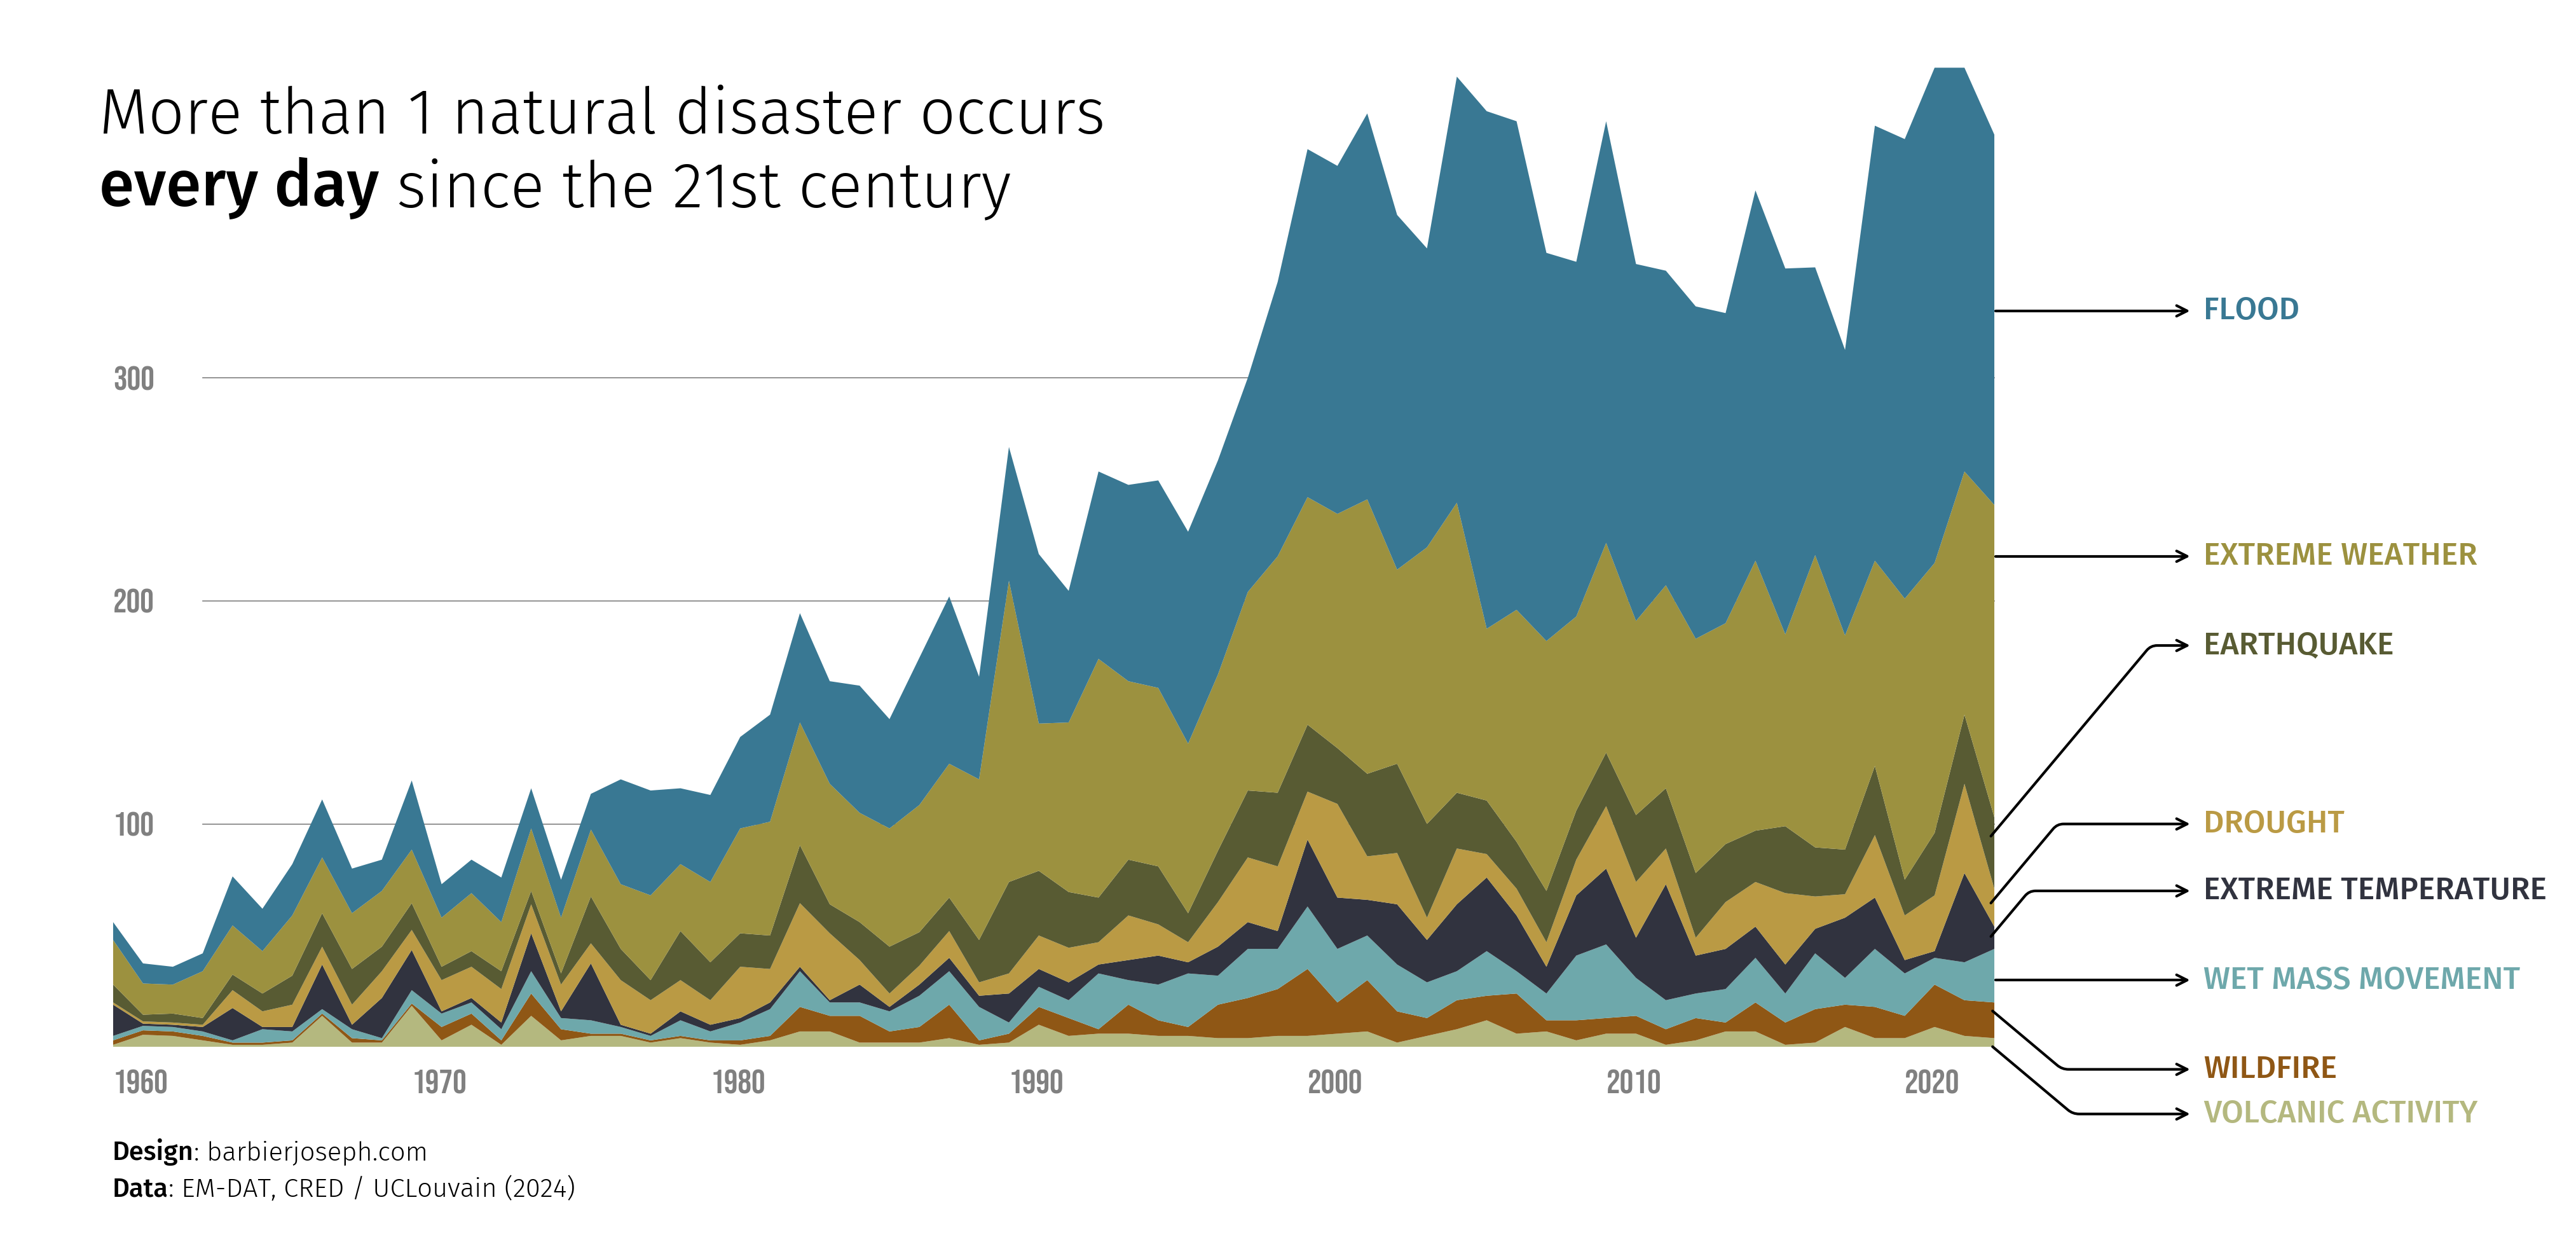

In [374]:
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

columns = df.sum().sort_values().index.to_list()

# yes I tried several palettes. Dali is the best IMO.
colors = get_hex('Antique')
colors = get_hex('Autumn')
colors = get_hex('Demuth')
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

x = df.index
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.155, y=.83, fontsize=24, 
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      font=font, fontsize=13,
      color='grey'
   )

for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      font=font, fontsize=13,
      color='grey'
   )
   ax.plot([1963, 2023], [value, value], color='grey', lw=.4, zorder=-1)

text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
   s=text, x=.16, y=.05,
   fontsize=10, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font},{'font': other_bold_font}]
)
y_pos = [330, 220, 180, 100, 70, 30, -10, -30]
for i in range(len(y_pos)):
   ax_text(
      x=2030, y=y_pos[i], s=columns[::-1][i].upper(),
      va='center', ha='left',
      font=other_bold_font, fontsize=12,
      color=colors[7-i]
   )

# add inflexion arrows
x_axis_start = 2022.6
x_axis_end = 2030
radius = 10
inflexion_arrow(ax, (x_axis_end, 330), (x_axis_start, 330), f"angle,angleA=180,angleB=90,rad={radius}")
inflexion_arrow(ax, (x_axis_end, 220), (x_axis_start, 220), f"angle,angleA=180,angleB=90,rad={radius}")
inflexion_arrow(ax, (x_axis_end, 180), (x_axis_start, 90), f"angle,angleA=50,angleB=180,rad={radius}")
inflexion_arrow(ax, (x_axis_end, 100), (x_axis_start, 60), f"angle,angleA=50,angleB=180,rad={radius}")
inflexion_arrow(ax, (x_axis_end, 70), (x_axis_start, 45), f"angle,angleA=50,angleB=180,rad={radius}")
inflexion_arrow(ax, (x_axis_end, 30), (x_axis_start, 30), f"angle,angleA=180,angleB=90,rad={radius}")
inflexion_arrow(ax, (x_axis_end, -10), (x_axis_start, 20), f"angle,angleA=140,angleB=180,rad={radius}")
inflexion_arrow(ax, (x_axis_end, -30), (x_axis_start, 4), f"angle,angleA=140,angleB=180,rad={radius}")

plt.savefig('natural-disasters.png', bbox_inches='tight', dpi=300)
plt.show()

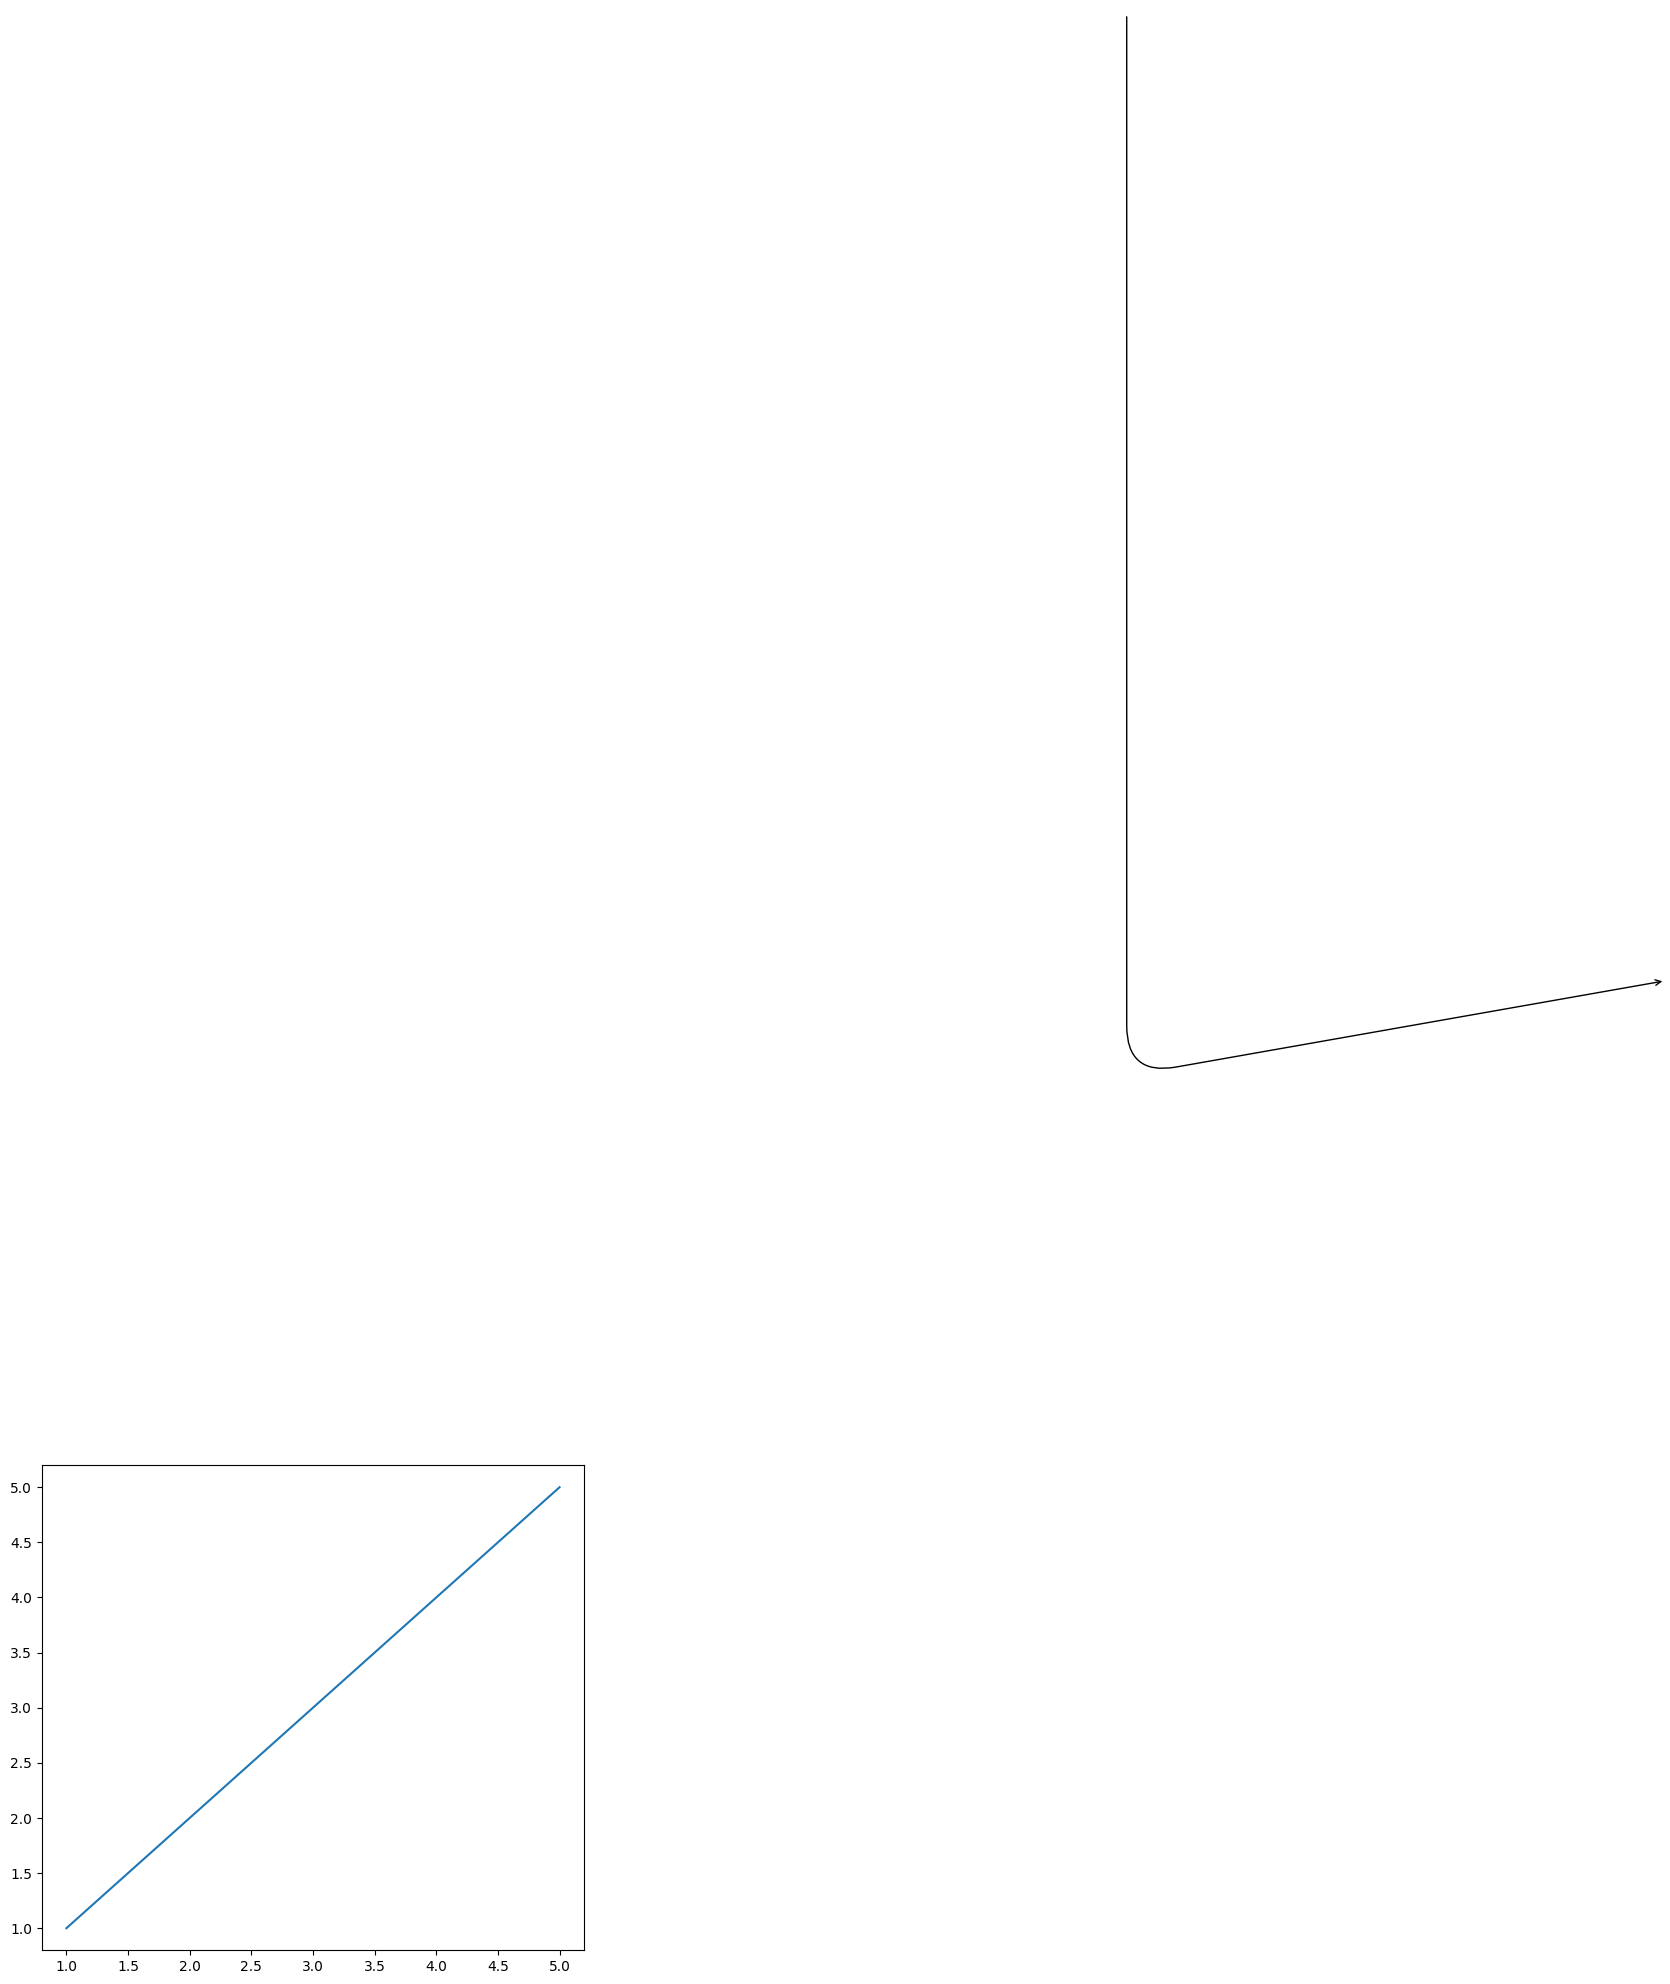

In [265]:
import matplotlib.pyplot as plt


def inflexion_arrow(ax, start, end, connectionstyle, color="black", transform=None):
    x1, y1 = start
    x2, y2 = end
    if transform is None:
        transform = ax.transData
    ax.annotate(
        "",
        xy=(x1, y1), xycoords=transform,
        xytext=(x2, y2), textcoords=transform,
        arrowprops=dict(
            arrowstyle="->", color=color,
            shrinkA=5, shrinkB=5,
            patchA=None, patchB=None,
            connectionstyle=connectionstyle,
        ),
    )


fig, axs = plt.subplots(figsize=(7, 6.3), dpi=100)
axs.plot([1,5], [1,5])
inflexion_arrow(
    ax=axs,
    start=(3, 2),
    end=(2, 4),
    connectionstyle="angle,angleA=-90,angleB=10,rad=50",
    transform=axs.transAxes,
)

plt.show()